#### read the output file


- Load all the needed packages

In [2]:
import os
import pandas as pd
import matplotlib
import main_single
from os.path import exists
import argparse
import matplotlib.pyplot as plt

- generate the command runing the python script several times

In [60]:
command = ""
for model_name in [ 'VRNN-Gauss', 'VRNN-Gauss-I', 'VRNN-GMM', 'VRNN-GMM-I', 'STORN']:
    for known_parameter in ['None', 'B']:
        command += "python main_single.py --model \"{}\" --known_parameter \"{}\"\n".format(model_name, known_parameter)
        
myBat = open(r'sameinput_multi.bat','w+')
myBat.write(command)
myBat.close()


In [ ]:


def read_single_output_RMSE_log(path_general, options):
    path_RMSE_log = path_general+"RSME.csv"
    if exists(path_RMSE_log):
        RMSE_log = pd.read_csv(path_RMSE_log)
    else:                                
        generate_output_RMSE_log(path_general,options)
        
def get_more_test(options, path_general, file_name_general):
    available_RMSE = read_single_output_RMSE_log(path_general)

In [54]:
# this is udes to generate and same an identical training dataset, in case the different models are generated on the different dataset making it impossible to compare

import data.toy_lgssm as datalgssm
import numpy as np

def create_input_data():
    # state space matrices
    A = np.array([[0.7, 0.8], [0, 0.1]])
    B = np.array([[-1], [0.1]])
    C = np.array([[1], [0]]).transpose()
    # define noise
    sigma_state = np.sqrt(0.25)
    sigma_out = np.sqrt(1)
    
    # set the input dataset size
    k_train_size = 5000
    k_val_size = 5000 
    
    u_train = (np.random.rand(1, k_train_size) - 0.5) * 5
    u_val = (np.random.rand(1, k_val_size) - 0.5) * 5
    
    train_file_path = 'data/Toy_LGSSM/toy_lgssm_traindata'
    val_file_path = 'data/Toy_LGSSM/toy_lgssm_valdata'
    
    # get the outputs
    y_train = datalgssm.run_toy_lgssm_sim(u_train, A, B, C, sigma_state, 0) + sigma_out * np.random.randn(1, k_train_size)
    y_val = datalgssm.run_toy_lgssm_sim(u_val, A, B, C, sigma_state, 0) + sigma_out * np.random.randn(1, k_val_size)
    
    
    np.savez(train_file_path+".npz", u_train = u_train, y_train = y_train)
    np.savez(val_file_path+".npz", u_val=u_val, y_val=y_val)
    
    

- read from csv file and plot the result?

In [3]:
# set the path
model_path = "C:/Users/ruiyuanli/OneDrive - Delft University of Technology/work/github/DeepSSM_SysID/log/same_dataset/toy_lgssm/"

# generate the list of trained models
output_files = []
model_type = os.listdir(model_path) 
for name in model_type:     
    data_path = (model_path+name+"/data/")
    all_files = os.listdir(data_path)   
    output_files.append(data_path +  list(filter(lambda f: f.endswith('.csv'), all_files))[0])
    
print(output_files)
    

['C:/Users/ruiyuanli/OneDrive - Delft University of Technology/work/github/DeepSSM_SysID/log/same_dataset/toy_lgssm/STORN_B/data/toy_lgssm_h70_z5_n1.csv', 'C:/Users/ruiyuanli/OneDrive - Delft University of Technology/work/github/DeepSSM_SysID/log/same_dataset/toy_lgssm/STORN_None/data/toy_lgssm_h70_z5_n1.csv', 'C:/Users/ruiyuanli/OneDrive - Delft University of Technology/work/github/DeepSSM_SysID/log/same_dataset/toy_lgssm/VAE-RNN_B/data/toy_lgssm_h70_z5_n1.csv', 'C:/Users/ruiyuanli/OneDrive - Delft University of Technology/work/github/DeepSSM_SysID/log/same_dataset/toy_lgssm/VAE-RNN_None/data/toy_lgssm_h70_z5_n1.csv', 'C:/Users/ruiyuanli/OneDrive - Delft University of Technology/work/github/DeepSSM_SysID/log/same_dataset/toy_lgssm/VRNN-Gauss-I_B/data/toy_lgssm_h70_z5_n1.csv', 'C:/Users/ruiyuanli/OneDrive - Delft University of Technology/work/github/DeepSSM_SysID/log/same_dataset/toy_lgssm/VRNN-Gauss-I_None/data/toy_lgssm_h70_z5_n1.csv', 'C:/Users/ruiyuanli/OneDrive - Delft University 

In [4]:
rmse_lgssm = {}
for i in range(len(output_files)):
    df = pd.read_csv(output_files[i])
    rmse_lgssm[model_type[i]] = df["rmse"].mean()

In [7]:
sorted_rmse_lgssm={k: v for k, v in sorted(rmse_lgssm.items(), key=lambda item: item[1])}

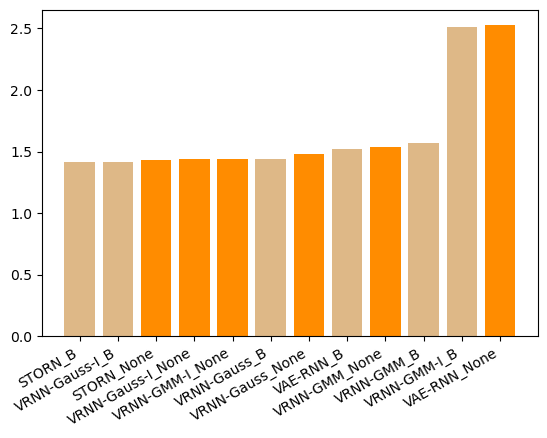

In [10]:

fig, ax = plt.subplots()

colors = []
for m in list(sorted_rmse_lgssm.keys()):
    if m.endswith('B'):
        colors.append("burlywood")
    else:
        colors.append("darkorange")
ax.bar(list(sorted_rmse_lgssm.keys()), list(sorted_rmse_lgssm.values()),color = colors)
fig.autofmt_xdate()
plt.show()

In [11]:
sorted_rmse_lgssm

{'STORN_B': 1.417777566799685,
 'VRNN-Gauss-I_B': 1.4184243742487046,
 'STORN_None': 1.4284650262451115,
 'VRNN-Gauss-I_None': 1.4354421230155947,
 'VRNN-GMM-I_None': 1.4358903661142595,
 'VRNN-Gauss_B': 1.440856602479148,
 'VRNN-Gauss_None': 1.4772195167213509,
 'VAE-RNN_B': 1.5182364095940102,
 'VRNN-GMM_None': 1.5364218053458618,
 'VRNN-GMM_B': 1.5670340977099584,
 'VRNN-GMM-I_B': 2.5152034437291935,
 'VAE-RNN_None': 2.524048793699276}